In [112]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
db_filename = 'dinofunworld.db'
#conn = sqlite3.connect("./readonly/{0}".format(db_filename)) 
conn = sqlite3.connect(db_filename) 
c = conn.cursor()
# db_filename = 'dinofunworld.db'
# conn = sqlite3.connect("./readonly/{0}".format(db_filename))
# c = conn.cursor()

In [114]:
#Part 1: The park's administrators are worried about the attendance at the ride 'Atmosfear' in the data window. 
#To assuage their fears, they have asked you to create a control chart of the total attendance at this ride.
#Using the provided data, create a control chart displaying the attendance, mean, and standard deviation bands 
#at one and two standard deviations.

In [115]:
def getAttendance(sequenceString):
    totalSequences = sequenceString.split('-', sequencesBoundaryValue)
    return list(map(lambda y: 1 if y==atmosFearAttractionId else 0, totalSequences))

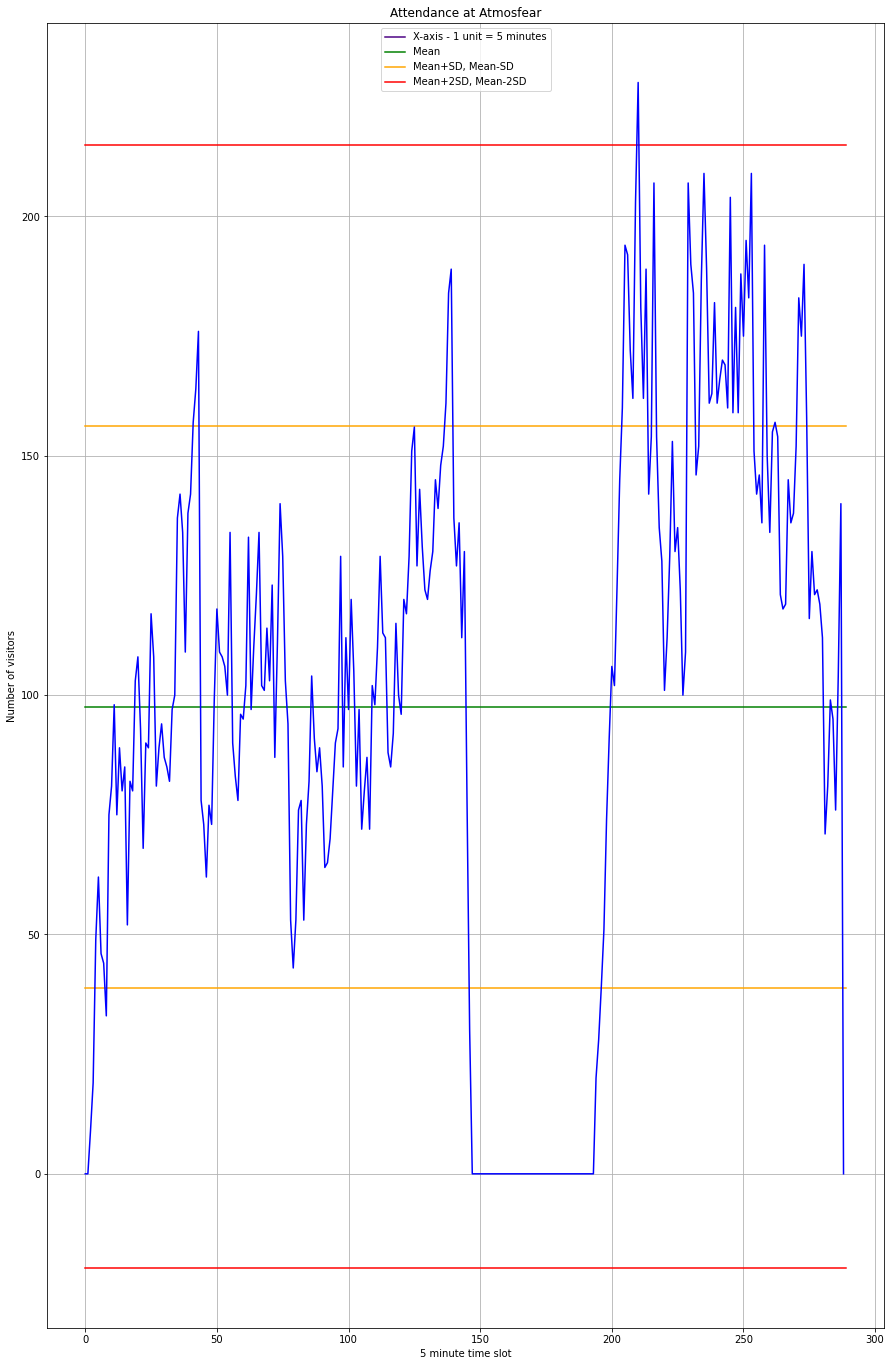

In [140]:
rideName = 'Atmosfear'
atmosFearFromDB = c.execute("SELECT AttractionID from attraction WHERE Name='{0}'".format(rideName)).fetchall()[0][0]

# return type from db will be of type int
atmosFearAttractionId = str(atmosFearFromDB)

sequences = c.execute("SELECT Sequence FROM Sequences").fetchall()
sequenceDataFrame = pd.DataFrame.from_records(sequences, columns = ['Sequences'])
atmosFearForEveryVisitor = list(map(lambda x: getAttendance(x), sequenceDataFrame['Sequences']))
summedAtmosFearVisitorsValue = [0]*len(atmosFearForEveryVisitor[0])

for atmosFearAVisitor in atmosFearForEveryVisitor:
    summedAtmosFearVisitorsValue = [sum(x) for x in zip(summedAtmosFearVisitorsValue, atmosFearAVisitor)]

#mean and standard deviation of visitor count values
mean = np.nanmean(summedAtmosFearVisitorsValue)
standardDeviation = np.nanstd(summedAtmosFearVisitorsValue)

plt.plot([0, len(summedAtmosFearVisitorsValue)], [mean,mean], 'g-')
plt.plot([0, len(summedAtmosFearVisitorsValue)], [mean+standardDeviation,mean+standardDeviation], 'orange')
plt.plot([0, len(summedAtmosFearVisitorsValue)], [mean-standardDeviation,mean-standardDeviation], 'orange')
plt.plot([0, len(summedAtmosFearVisitorsValue)], [mean+2*standardDeviation,mean+2*standardDeviation], 'r-')
plt.plot([0, len(summedAtmosFearVisitorsValue)], [mean-2*standardDeviation,mean-2*standardDeviation], 'r-')
plt.plot(range(len(summedAtmosFearVisitorsValue)), summedAtmosFearVisitorsValue, 'b-')
plt.title('Attendance at Atmosfear')
plt.xlabel('5 minute time slot')
plt.ylabel('Number of visitors')
plt.grid(True)

#changing the size of the graph
f = plt.gcf()
fig_width, fig_height = f.get_size_inches()
f.set_figwidth(fig_width*2.5)
f.set_figheight(fig_height*6.0)

#adding the legend and changing the color of the legend
plt.legend(['X-axis - 1 unit = 5 minutes', 'Mean', 'Mean+SD, Mean-SD', 'Mean+2SD, Mean-2SD'], loc=9)
ax = plt.gca()
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color('indigo')
hl_dict['_child1'].set_color('green')
hl_dict['_child2'].set_color('orange')
hl_dict['_child3'].set_color('red')
plt.show()